In [1]:
import sys
import os

root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root)
print(os.getcwd())

/Users/kashyap/Library/CloudStorage/ProtonDrive-kashyap.suthar07@pm.me-folder/Capstone_Project/models


In [2]:
# Import preprocessing and save_metrics
from utils.preprocessing import load_and_trasnform, preprocessing_data
from utils.save_metrics import save_metrics

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

print("All imports successful!")

All imports successful!


In [3]:
X, y = load_and_trasnform("../data/train.csv")

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train:", X_train.shape)
print("X_val:", X_val.shape)


X_train: (1119, 80)
X_val: (280, 80)


In [4]:
preprocessor = preprocessing_data(X_train)

In [5]:
linear = LinearRegression()

linear_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", linear),
])


In [6]:
linear_pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [7]:
y_val_pred = linear_pipe.predict(X_val)

In [8]:
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
rmse = np.sqrt(mse)

print("Linear Regression")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

Linear Regression
MSE: 422423768.9051329
RMSE: 20552.950369840648
MAE: 13708.14652893988
R2: 0.867196473072594


In [9]:
save_metrics("Linear Regression", mse, rmse, mae, r2)

Saved metrics to /Users/kashyap/Library/CloudStorage/ProtonDrive-kashyap.suthar07@pm.me-folder/Capstone_Project/utils/../metrics/linear_regression.json


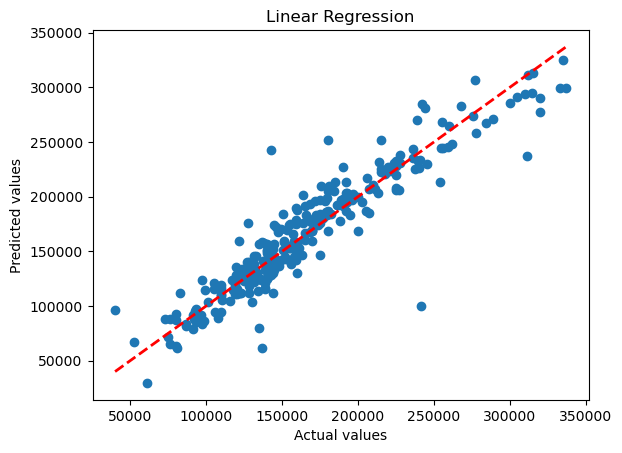

In [10]:
plt.figure()
plt.scatter(y_val, y_val_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Linear Regression")
plt.show()